## 2023 06/22 Green Tint Removal

*Last Updated*: 2023-06-22

### Authors
* Hannah Zhang (hannahzhang@ucsb.edu)


### Overview
This Jupyter notebook is intended to demonstrate

* removing green tint from hand outline generated by rembg algorithm



### Key Results

- able to isolate green color from rest of hand

In [ ]:
import os
import cv2
import glob
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


In [9]:
from rembg import remove
import easygui
from PIL import Image
from numpy import asarray

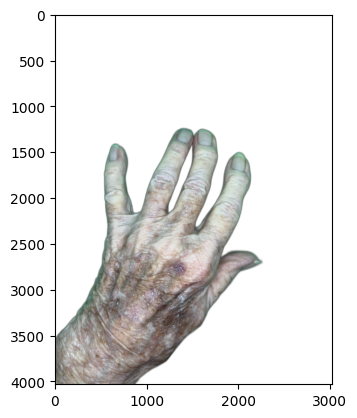

In [10]:
im = Image.open('/Applications/DermaML/16B45EFF-7F1D-4437-B8FA-C7D4ADBF4F92.jpeg')

output = remove(im)
# output.show()

numpydata = asarray(output)
plt.imshow(numpydata)

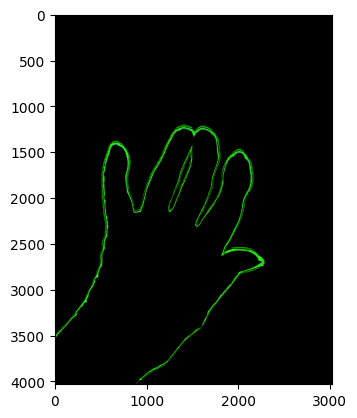

In [11]:
#frame=cv2.imread(numpydata)
hsv=cv2.cvtColor(numpydata,cv2.COLOR_BGR2HSV)
l_b=np.array([20, 100, 0])
u_b=np.array([100, 300, 900])

mask=cv2.inRange(hsv,l_b,u_b)
res = cv2.bitwise_and(hsv, hsv, mask= mask)
#cv2.imshow('frame',mask)
plt.imshow(res)

In [14]:
kernelSize = 3
# Set morph operation iterations:
opIterations = 1
# Get the structuring element:
morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
# Perform closing:
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, morphKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

# Add the white mask to the grayscale image:
colorMask = cv2.add(hsv, mask)
_, binaryImage = cv2.threshold(colorMask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite('bwimage.jpg',binaryImage)
thresh, im_bw = cv2.threshold(binaryImage, 210, 230, cv2.THRESH_BINARY)
kernel = np.ones((1, 1), np.uint8)
imgfinal = cv2.dilate(im_bw, kernel=kernel, iterations=1)
cv2.imshow(imgfinal)

error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'
